### **California Housing Price**

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### **Business Problem Understanding**

**Context**

Masalah harga perumahan di California mengacu pada tantangan dan dinamika yang terkait dengan fluktuasi dan kenaikan harga properti di negara bagian California, Amerika Serikat. California dikenal dengan pasar perumahan yang sangat dinamis dan seringkali mengalami peningkatan harga yang signifikan. Tantangan utama melibatkan ketersediaan perumahan yang terbatas, pertumbuhan populasi yang tinggi, serta faktor-faktor ekonomi dan kebijakan perencanaan kota yang berpengaruhat.

**Problem Statement**

Masalah harga perumahan di California dapat menjadi tantangan serius. Pertama-tama, tingginya permintaan akan tempat tinggal di daerah tersebut menyebabkan kenaikan harga yang signifikan. Faktor-faktor seperti pertumbuhan populasi, kebijakan perencanaan kota, dan daya tarik ekonomi daerah tersebut dapat berdampak besar pada harga perumahan. Kekurangan pasokan rumah juga menjadi masalah terutama di kota-kota padat, yang menyebabkan persaingan yang ketat dan harga yang terus meningkat. **Dengan bertambahnya jumlah tuan rumah di California, menentukan harga yang tepat untuk dapat tetap kompetitif sangatlah penting agar dapat menetapkan harga rumah yang tepat agar dapat kompetitif dan memiliki margin profit maksimal**.*.

**Goals**

Berdasarkan permasalahan tersebut, Tuan tanah tentu perlu memiliki 'tool' yang dapat memprediksi serta membantu mereka (dalam hal ini tuan rumah) untuk dapat **menentukan harga jual properti yang tepat untuk tiap properti yang akan mereka jual**. Adanya perbedaan pada berbagai fitur yang terdapat pada suatu properti, seperti jumlah ruang, jumlah kamar, lokasi, umur properti dapat menambah keakuratan prediksi rata - rata valuasi properti, yang mana dapat mendatangkan profit bagi tuan rumah, dan juga tentunya masih terjangkau bagi pembeli.

Bagi tuan rumah, prediction tool yang dapat memberikan prediksi harga secara tepat tentu dapat meningkatkan margin profit melalui harga yang kompetitif sesuai dengan karakteristik properti tersebut. Dengan demikin tuan rumah bisa mendapatkan harga terbaik untuk setiap properti yang dijualnya.

**Analytic Approach**

Jadi, yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan satu properti dengan yang lainnya. 

Selanjutnya, kita akan membangun suatu model regresi yang akan membantu perusahaan untuk dapat menyediakan 'tool' prediksi valuasi properti yang baru masuk dalam daftar, yang mana akan berguna untuk tuan rumah (host) dalam menentukan harga jual properti-nya.

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan. 

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

### **Data Understanding & Cleaning**

Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan data understanding. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan data cleaning. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara domain knowledge maupun secara statistik.

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:
- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan melakukan input dengan nilai yang paling masuk akal berdasarkan kasusnya.

Pertama, mari kita lihat informasi properti dari dataset California Housing Price.

In [85]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [390]:
# Load dataset
df = pd.read_csv('data_california_house.csv')
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -119.79     36.73                52.0        112.0            28.0   
1    -122.21     37.77                43.0       1017.0           328.0   
2    -118.04     33.87                17.0       2358.0           396.0   
3    -118.28     34.06                17.0       2518.0          1196.0   
4    -119.81     36.73                50.0        772.0           194.0   

   population  households  median_income ocean_proximity  median_house_value  
0       193.0        40.0         1.9750          INLAND             47500.0  
1       836.0       277.0         2.2604        NEAR BAY            100000.0  
2      1387.0       364.0         6.2990       <1H OCEAN            285800.0  
3      3051.0      1000.0         1.7199       <1H OCEAN            175000.0  
4       606.0       167.0         2.2206          INLAND             59200.0

- Dataset merupakan data listing properti di negara bagian California pada tahun 1990.
- Setiap baris data merepresentasikan informasi terkait properti dan karakteristiknya.

In [4]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (14448, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


Berikut adalah penjelasan tiap field :
1. longitude : Posisi timur atau barat suatu lokasi pada garis bujur.
2. latitude : Posisi utara atau selatan suatu lokasi pada garis lintang.
3. housing_median_age: Usia median dari rumah-rumah dalam suatu wilayah untuk memberikan gambaran tentang sejauh mana suatu wilayah memiliki bangunan yang relatif baru atau tua.
4. total_rooms : Total ruangan pada rumah.
5. total_bedrooms : Total kamar tidur pada rumah.
6. population : Jumlah total populasi pada suatu wilayah.
7. households : Jumlah total rumah tangga pada suatu wilayah.
8. median_income : Income rata - rata rumah tangga pada suatu wilayah.
9. ocean_proximity : Seberapa dekat suatu wilayah dengan garis pantai.
10. median_house_value : Nilai median rumah dalam suatu wilayah.

In [5]:
display(df.describe(), df.describe(include="object"))

longitude      latitude  housing_median_age   total_rooms  \
count  14448.000000  14448.000000        14448.000000  14448.000000   
mean    -119.566647     35.630093           28.618702   2640.132683   
std        2.006587      2.140121           12.596694   2191.612441   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1451.000000   
50%     -118.490000     34.260000           29.000000   2125.000000   
75%     -118.000000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  32627.000000   

       total_bedrooms    population    households  median_income  \
count    14311.000000  14448.000000  14448.000000   14448.000000   
mean       538.260709   1425.157323    499.508929       3.866667   
std        423.577544   1149.580157    383.098390       1.891158   
min          1.000000      3.000000      1.000000       0.499900   
25%        295.000000    784.000000    279.000000       2.570600   
50%        435.000000   1165.000000    410.000000       3.539100   
75%        647.000000   1724.000000    604.000000       4.736100   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        14448.000000  
mean        206824.624516  
std         115365.476182  
min          14999.000000  
25%         119600.000000  
50%         180000.000000  
75%         263900.000000  
max         500001.000000

ocean_proximity
count            14448
unique               5
top          <1H OCEAN
freq              6369

Secara umum, kita bisa melihat bahwa:
* dataset California Housing Price memiliki 10 kolom dan 14.448 baris
* dataset ini merupakan data housing sebanyak 14.448 housing dengan 5 jenis ocean proximity pada tahun 1990.
* kolom `langitude` berisikan posisi properti pada garis bujur sehingga bisa diparsing menjadi object karena tidak dapat dilakukan operasi aritmatika.
* kolom `latitude` berisikan posisi properti pada garis lintang sehingga bisa diparsing menjadi object karena tidak dapat dilakukan operasi aritmatika.
* kolom `housing_median_age` berisikan data rata - rata umur properti dalam satuan tahun.
* kolom `total_bedrooms` berisikan data jumlah kamar tidur pada properti dan terdapat 147 data yang null (kosong) dari 14.448 data.
* beberapa data kategorik ordinal, bisa dibuatkan kolom baru berdasarkan ranking kategorinya untuk memudahkan analisis (opsional)

### Missing Value

In [11]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.948228
population            0.000000
households            0.000000
median_income         0.000000
ocean_proximity       0.000000
median_house_value    0.000000
dtype: float64

**Secara garis besar:**

Kita bisa melihat bahwa terdapat data yang missing (N/A) ataupun NaN pada data yang diberikan di kolom total_bedrooms sejumlah 137 dari 14.448 data atau sekitar 0.9% dari keseluruhan data.

In [17]:
df[df["total_bedrooms"].isna()]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
88       -121.47     38.61                31.0       1072.0             NaN   
119      -117.28     34.26                18.0       3895.0             NaN   
251      -117.61     34.08                12.0       4427.0             NaN   
340      -122.70     38.35                14.0       2313.0             NaN   
410      -122.42     40.44                16.0        994.0             NaN   
...          ...       ...                 ...          ...             ...   
13856    -117.96     34.03                35.0       2093.0             NaN   
13932    -117.87     33.83                27.0       2287.0             NaN   
13989    -118.40     34.17                24.0       6347.0             NaN   
14308    -118.55     34.19                18.0       5862.0             NaN   
14445    -121.90     36.58                31.0       1431.0             NaN   

       population  households  median_income ocean_proximity  \
88          781.0       281.0         1.6563          INLAND   
119        1086.0       375.0         3.3672          INLAND   
251        2400.0       843.0         4.7147          INLAND   
340         954.0       397.0         3.7813       <1H OCEAN   
410         495.0       181.0         2.1875          INLAND   
...           ...         ...            ...             ...   
13856      1755.0       403.0         3.4115       <1H OCEAN   
13932      1140.0       351.0         5.6163       <1H OCEAN   
13989      2945.0      1492.0         3.3545       <1H OCEAN   
14308      3161.0      1280.0         3.1106       <1H OCEAN   
14445       704.0       393.0         3.1977      NEAR OCEAN   

       median_house_value  
88                65800.0  
119              133600.0  
251              158700.0  
340              146500.0  
410               76400.0  
...                   ...  
13856            150400.0  
13932            231000.0  
13989            221500.0  
14308            170600.0  
14445            289300.0  

[137 rows x 10 columns]

Dikarenakan jumlah data yang memiliki kolom `total_bedrooms` kosong hanya sekitar 0.9% dari keseluruhan data. Maka data - data dengan kolom `total_bedrooms` yang kosong ini bisa kita hapus untuk menghindari kesalahan pada saat melakukan analisa dikarenakan anomali data.

In [391]:
df = df[df["total_bedrooms"].notnull()]
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -119.79     36.73                52.0        112.0            28.0   
1    -122.21     37.77                43.0       1017.0           328.0   
2    -118.04     33.87                17.0       2358.0           396.0   
3    -118.28     34.06                17.0       2518.0          1196.0   
4    -119.81     36.73                50.0        772.0           194.0   

   population  households  median_income ocean_proximity  median_house_value  
0       193.0        40.0         1.9750          INLAND             47500.0  
1       836.0       277.0         2.2604        NEAR BAY            100000.0  
2      1387.0       364.0         6.2990       <1H OCEAN            285800.0  
3      3051.0      1000.0         1.7199       <1H OCEAN            175000.0  
4       606.0       167.0         2.2206          INLAND             59200.0

In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14311 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14311 non-null  float64
 1   latitude            14311 non-null  float64
 2   housing_median_age  14311 non-null  float64
 3   total_rooms         14311 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14311 non-null  float64
 6   households          14311 non-null  float64
 7   median_income       14311 non-null  float64
 8   ocean_proximity     14311 non-null  object 
 9   median_house_value  14311 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.2+ MB


In [26]:
display(df.head(), df.tail())

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -119.79     36.73                52.0        112.0            28.0   
1    -122.21     37.77                43.0       1017.0           328.0   
2    -118.04     33.87                17.0       2358.0           396.0   
3    -118.28     34.06                17.0       2518.0          1196.0   
4    -119.81     36.73                50.0        772.0           194.0   

   population  households  median_income ocean_proximity  median_house_value  
0       193.0        40.0         1.9750          INLAND             47500.0  
1       836.0       277.0         2.2604        NEAR BAY            100000.0  
2      1387.0       364.0         6.2990       <1H OCEAN            285800.0  
3      3051.0      1000.0         1.7199       <1H OCEAN            175000.0  
4       606.0       167.0         2.2206          INLAND             59200.0

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14442    -120.06     36.94                19.0        901.0           183.0   
14443    -121.26     38.27                20.0       1314.0           229.0   
14444    -120.89     37.48                27.0       1118.0           195.0   
14446    -117.93     33.62                34.0       2125.0           498.0   
14447    -115.56     32.80                15.0       1171.0           328.0   

       population  households  median_income ocean_proximity  \
14442       700.0       190.0         2.2375          INLAND   
14443       712.0       219.0         4.4125          INLAND   
14444       647.0       209.0         2.9135          INLAND   
14446      1052.0       468.0         5.6315       <1H OCEAN   
14447      1024.0       298.0         1.3882          INLAND   

       median_house_value  
14442             64300.0  
14443            144600.0  
14444            159400.0  
14446            484600.0  
14447             69400.0

### Anomali Data

Selain missing value, kita juga harus memastikan data yang dimiliki valid dan terbebas dari anomali yang dapat menyebabkan kesalahan pada saat melakukan analisa.


In [35]:
df2 = df.groupby(["latitude","longitude"])["ocean_proximity"].agg(["count"])
df2[df2["count"] > 1].head()

count
latitude longitude       
32.56    -117.05        2
32.57    -117.10        2
         -117.09        2
         -117.06        2
32.58    -117.13        2

In [36]:
df["ocean_proximity"].unique()

array(['INLAND', 'NEAR BAY', '<1H OCEAN', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [393]:
df[df["ocean_proximity"] == 'ISLAND'].count()

longitude             2
latitude              2
housing_median_age    2
total_rooms           2
total_bedrooms        2
population            2
households            2
median_income         2
ocean_proximity       2
median_house_value    2
dtype: int64

Sepertinya  ada kesalahan input pada kolom ocean_proximity dimana ada value `ISLAND` berjumlah 2 data, oleh karena itu akan dilakukan update `ISLAND` menjadi `INLAND` terhadap 2 data tersebut.

In [394]:
df.loc[df["ocean_proximity"] == 'ISLAND', 'ocean_proximity'] = 'INLAND'

In [37]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  14311.000000  14311.000000        14311.000000  14311.000000   
mean    -119.567150     35.631365           28.609671   2640.917686   
std        2.006374      2.139589           12.606493   2197.192896   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1452.000000   
50%     -118.490000     34.260000           29.000000   2125.000000   
75%     -118.000000     37.715000           37.000000   3142.000000   
max     -114.310000     41.950000           52.000000  32627.000000   

       total_bedrooms    population    households  median_income  \
count    14311.000000  14311.000000  14311.000000   14311.000000   
mean       538.260709   1424.772273    499.480470       3.866774   
std        423.577544   1151.795857    383.826005       1.890866   
min          1.000000      3.000000      1.000000       0.499900   
25%        295.000000    784.000000    279.000000       2.569400   
50%        435.000000   1164.000000    410.000000       3.540300   
75%        647.000000   1722.000000    603.500000       4.736100   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        14311.000000  
mean        206793.156942  
std         115404.371629  
min          14999.000000  
25%         119400.000000  
50%         180000.000000  
75%         263750.000000  
max         500001.000000

In [89]:
# Cek data duplikat
df.duplicated().sum()

0

Setelah dilakukan pengecekkan, tidak ditemukan adanya anomali serta duplikasi pada data yang tersisa. Dapat disimpulkan kalau data sekarang sudah bersih dan terbebas dari anomali.

## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [29]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(14311, 10)


dataFeatures dataType  null  unique           uniqueSample
0           longitude  float64     0     806      [-119.5, -121.61]
1            latitude  float64     0     835         [36.58, 32.71]
2  housing_median_age  float64     0      52           [19.0, 30.0]
3         total_rooms  float64     0    5213       [3132.0, 4922.0]
4      total_bedrooms  float64     0    1748         [482.0, 956.0]
5          population  float64     0    3491       [1558.0, 1330.0]
6          households  float64     0    1646        [1292.0, 675.0]
7       median_income  float64     0    9726       [3.9518, 4.1692]
8     ocean_proximity   object     0       5  [<1H OCEAN, NEAR BAY]
9  median_house_value  float64     0    3540   [429000.0, 334800.0]

Sebelum dibersihkan, kita memiliki 137 baris data yang memiliki `total_bedrooms` null (kosong), sekarang kita sudah tidak memiliki data dengan `total_bedrooms` kosong. Sekitar 137 baris data telah dihapus dan sekarang sudah tersisa 14.311 data.

#### **Exploratory Data Analysis**

**Distribution of Housing Value**

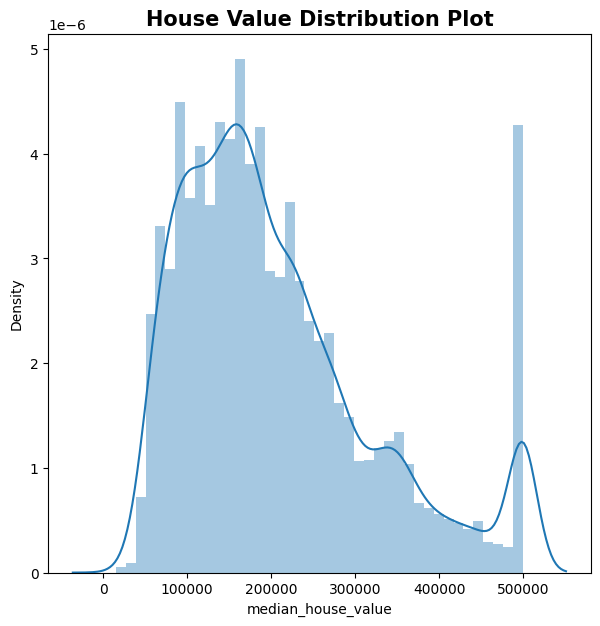

In [299]:
# Plot distribusi fitur 'price'
plt.figure(figsize=(7, 7))
sns.distplot(df['median_house_value'])
plt.title('House Value Distribution Plot', size=15, weight='bold');

Berdasarkan plot distribusi median house value di negara bagian California, terlihat bahwa terdapat 'right-skewed distribution'. Dengan kata lain, terdapat skewness positif pada fitur median house value.

**Types of property related to house value**

In [300]:
# Cek jumlah properti berdasarkan neighbourhood group dan tipenya
print(f"Jumlah properti di tiap ocean proximity:\n{df['ocean_proximity'].value_counts()}")
print(f"\nJumlah tiap umur properti:\n{df['housing_median_age'].value_counts()}")

Jumlah properti di tiap ocean proximity:
ocean_proximity
<1H OCEAN     6300
INLAND        4546
NEAR OCEAN    1855
NEAR BAY      1610
Name: count, dtype: int64

Jumlah tiap umur properti:
housing_median_age
52.0    891
36.0    580
35.0    568
16.0    518
17.0    501
34.0    491
33.0    428
26.0    424
18.0    394
25.0    393
32.0    392
37.0    368
19.0    357
28.0    349
15.0    340
30.0    336
24.0    334
27.0    333
29.0    320
20.0    319
21.0    311
31.0    307
23.0    302
14.0    292
22.0    274
38.0    272
42.0    266
44.0    255
39.0    244
43.0    243
41.0    219
13.0    214
40.0    210
10.0    185
45.0    183
5.0     182
11.0    180
46.0    176
12.0    152
8.0     145
9.0     144
4.0     138
47.0    130
6.0     116
7.0     115
48.0    109
50.0     99
49.0     92
3.0      45
2.0      37
51.0     36
1.0       2
Name: count, dtype: int64


Kebanyakan properti berada pada <1H OCEAN dan merupakan properti yang berusia tua yakni 52 tahun.

In [301]:
# Grouping tipe properti berdasarkan neighbourhood group
df.groupby(['ocean_proximity', 'housing_median_age'])['longitude'].count()

ocean_proximity  housing_median_age
<1H OCEAN        2.0                    11
                 3.0                    18
                 4.0                    59
                 5.0                    61
                 6.0                    47
                                      ... 
NEAR OCEAN       48.0                   12
                 49.0                   12
                 50.0                   12
                 51.0                    6
                 52.0                  101
Name: longitude, Length: 205, dtype: int64

In [302]:
# Cek median price untuk tiap neighbourhood group
df_median_value = df.groupby(by=['ocean_proximity']).agg({'median_house_value':'median'}).reset_index()
df_median_value = df_median_value.set_index('ocean_proximity')
df_median_value = df_median_value.sort_values('median_house_value', ascending =False)
df_median_value.head()

median_house_value
ocean_proximity                    
NEAR BAY                   230800.0
NEAR OCEAN                 228100.0
<1H OCEAN                  215100.0
INLAND                     108800.0

ocean_proximity     <1H OCEAN    INLAND  NEAR BAY  NEAR OCEAN
housing_median_age                                           
1.0                       NaN   98350.0       NaN         NaN
2.0                  298500.0  164400.0  148750.0    158500.0
3.0                  284750.0  158300.0  273500.0    341300.0
4.0                  241500.0  149350.0  186800.0    251900.0
5.0                  243900.0  138800.0  212400.0    225600.0
6.0                  238000.0  130150.0  232800.0    279500.0
7.0                  219950.0  134100.0  278200.0    221600.0
8.0                  252150.0  123250.0  246300.0    162950.0
9.0                  253250.0  132500.0  228900.0    175000.0
10.0                 223600.0  116800.0  191700.0    217100.0
11.0                 209400.0  122000.0  297300.0    183200.0
12.0                 218300.0  115600.0  239950.0    221500.0
13.0                 224850.0  132700.0  195000.0    227100.0
14.0                 216850.0  128200.0  227600.0    171000.0
15.0                 212750.0  118500.0  203400.0    214200.0
16.0                 228200.0  125150.0  237100.0    210200.0
17.0                 216850.0  118850.0  186850.0    208200.0
18.0                 229100.0  107600.0  271700.0    247800.0
19.0                 218600.0  106500.0  199900.0    215600.0
20.0                 225000.0  104900.0  255350.0    169700.0
21.0                 234200.0  101900.0  240700.0    243800.0
22.0                 224950.0  102550.0  235300.0    243100.0
23.0                 224350.0   99300.0  224200.0    200600.0
24.0                 230000.0   98800.0  243000.0    272550.0
25.0                 237800.0  111900.0  220800.0    219950.0
26.0                 227000.0   94400.0  255300.0    212250.0
27.0                 237200.0  110200.0  265800.0    225000.0
28.0                 221650.0   96200.0  206500.0    220150.0
29.0                 216850.0   92400.0  187450.0    215800.0
30.0                 200000.0   94600.0  259200.0    214900.0
31.0                 209500.0   88600.0  210900.0    210800.0
32.0                 198300.0   91700.0  253600.0    186350.0
33.0                 203900.0   98100.0  225200.0    225000.0
34.0                 208800.0   92000.0  252800.0    254100.0
35.0                 197500.0   86900.0  207250.0    238600.0
36.0                 207850.0   96350.0  194600.0    237500.0
37.0                 195300.0   91900.0  221550.0    233000.0
38.0                 175900.0   87000.0  220100.0    188750.0
39.0                 179150.0   82100.0  209650.0    266300.0
40.0                 196200.0   83800.0  196250.0    289600.0
41.0                 173300.0   74900.0  153100.0    233000.0
42.0                 168800.0   95500.0  166650.0    231100.0
43.0                 184050.0   92700.0  141600.0    244200.0
44.0                 188500.0   93900.0  153000.0    262500.0
45.0                 213250.0   90950.0  151100.0    239450.0
46.0                 193350.0   95950.0  179000.0    217550.0
47.0                 160650.0   92500.0  198100.0    248450.0
48.0                 189700.0   84600.0  268500.0    205950.0
49.0                 230050.0  143100.0  169300.0    272100.0
50.0                 175000.0   70000.0  179900.0    187550.0
51.0                 318900.0  103800.0  307100.0    300600.0
52.0                 270700.0  112150.0  290900.0    243200.0

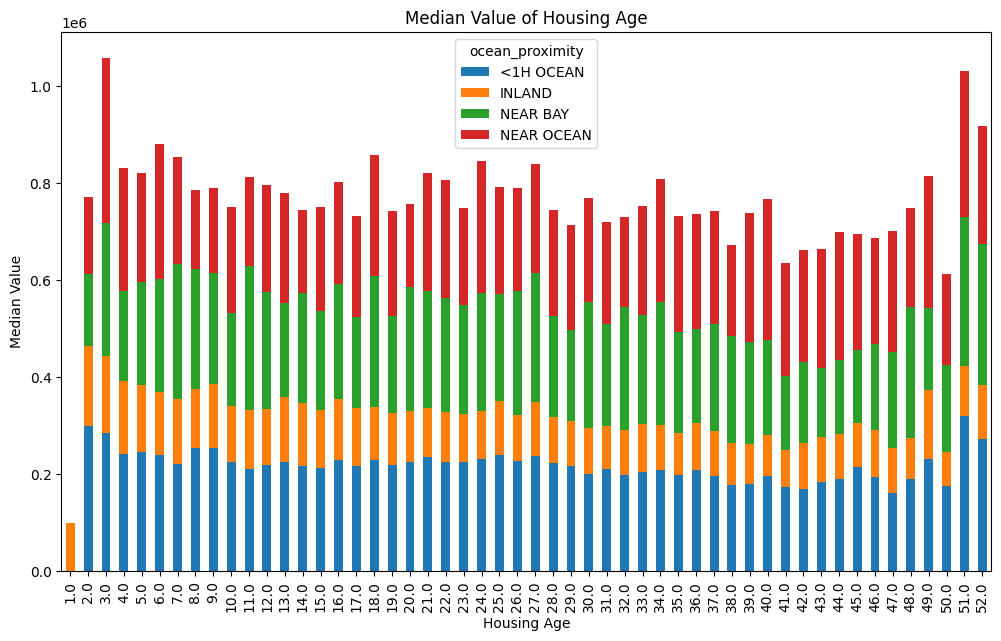

In [303]:
# Plot harga median untuk tiap tipe properti di setiap ocean proximity
from IPython.display import display

prox_pivot = df.pivot_table(index='housing_median_age', columns='ocean_proximity', values='median_house_value', aggfunc='median')
display(prox_pivot)

pivot_plot = prox_pivot.plot.bar(stacked=True, figsize=(12, 7))
pivot_plot.set_xlabel('Housing Age')
pivot_plot.set_ylabel('Median Value')
pivot_plot.set_title('Median Value of Housing Age');

Area dengan Ocean Proximity Island memiliki harga median tertinggi untuk tiap properti, dan rata - rata properti dengan Ocean Proximity adalah Island berumur 29 dan 52 tahun.

**Location**

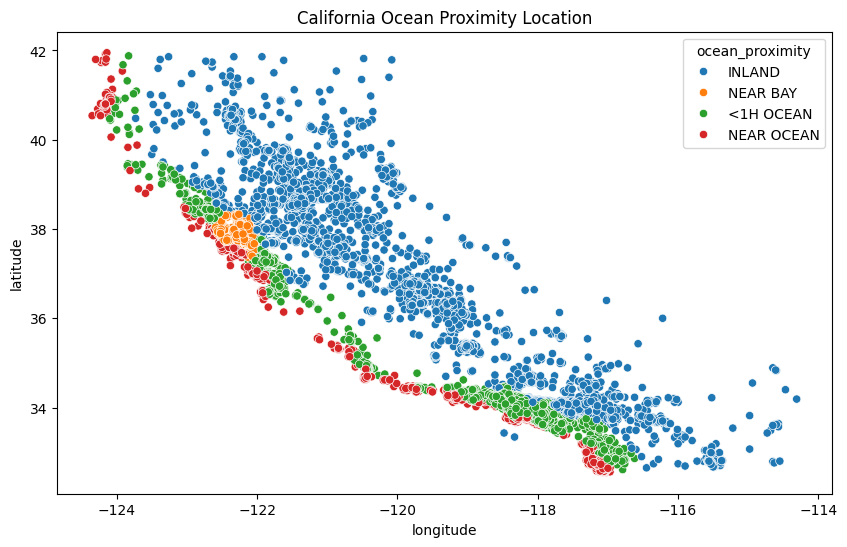

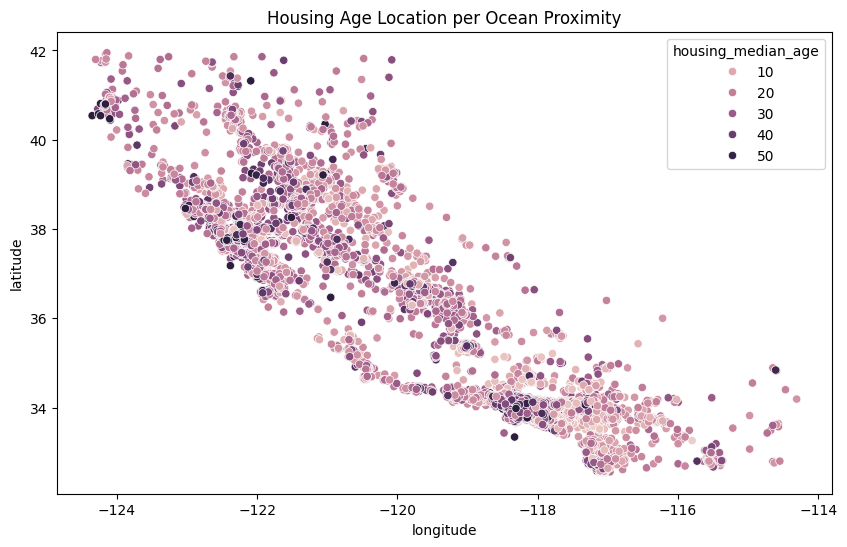

In [304]:
# Plot lokasi 'ocean_proximity'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['ocean_proximity']).set_title('California Ocean Proximity Location')

# Plot persebaran 'population'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['housing_median_age']).set_title('Housing Age Location per Ocean Proximity');

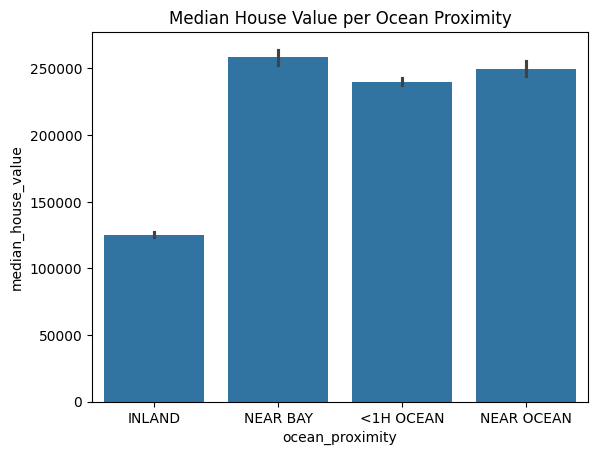

In [305]:
# Persebaran tipe kamar berdasarkan neighbourhood group
sns.barplot(x='ocean_proximity', y='median_house_value', data=df);
plt.title('Median House Value per Ocean Proximity');

Dari data diatas dapat dilihat bahwa properti dengan ocean proximity `Island` memiliki median house value tertinggi disusul dengan ocean proximity `Near Bay` dengan gap yang cukup mencolok. Hal ini dapat menjadi indikasi terkait hubungan antara ocean proximity dengan median value house.

Kemudian bisa dilihat dari scatter plot bahwa terdapat pola dan korelasi antara ocean proximity dengan median house value

**Population**

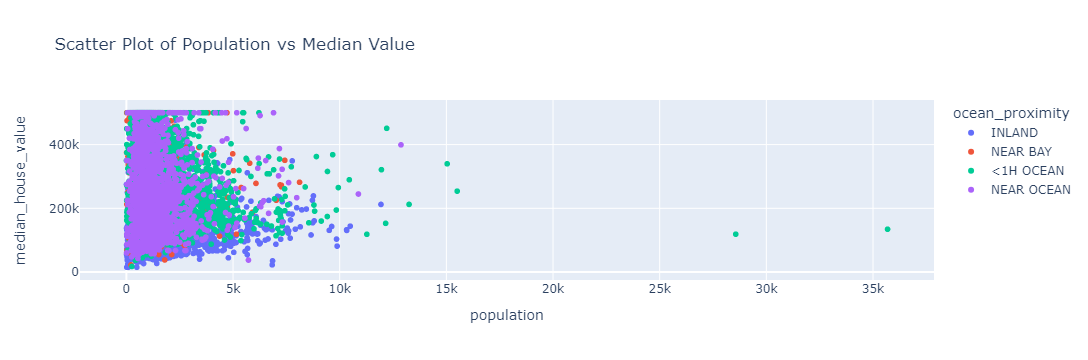

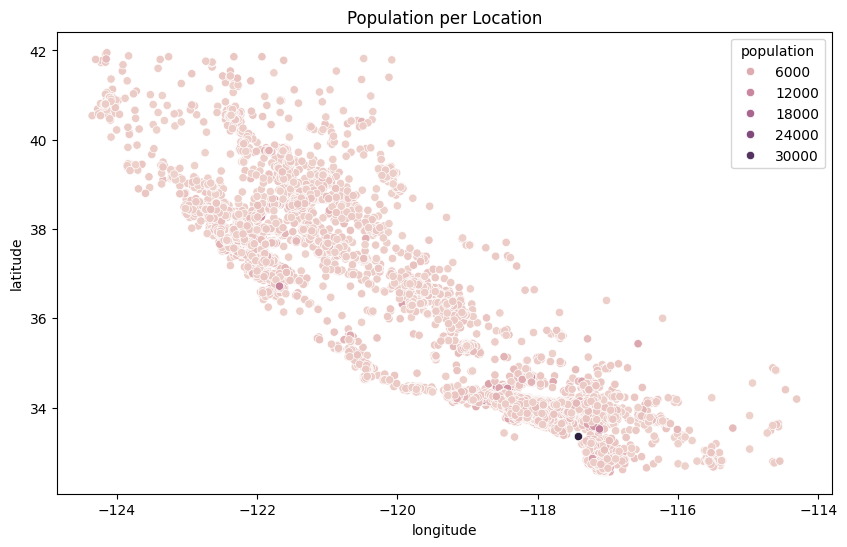

In [306]:
# Plot persebaran 'availability_365'
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['population']).set_title('Population per Location');

# Create a scatter plot using Plotly Express
fig = px.scatter(df, x='population', y='median_house_value', color='ocean_proximity', title='Scatter Plot of Population vs Median Value')

# Show the plot
fig.show()

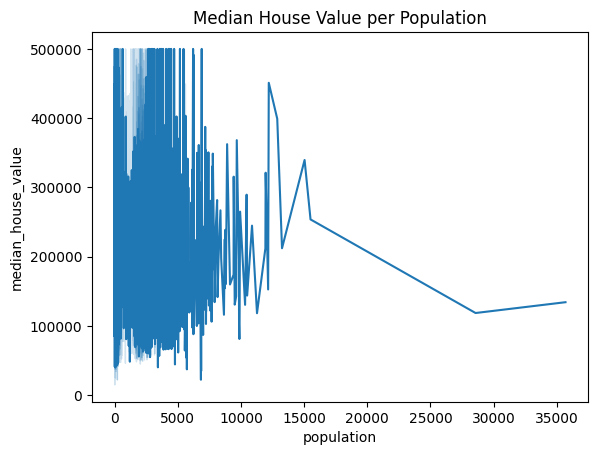

In [82]:
# Persebaran tipe kamar berdasarkan neighbourhood group
sns.lineplot(x='population', y='median_house_value', data=df);
plt.title('Median House Value per Population');

Dapat terlihat dari grafik bahwa median house value dengan nilai tertinggi pada range populasi dibawah 7.000.

**Median House Age**

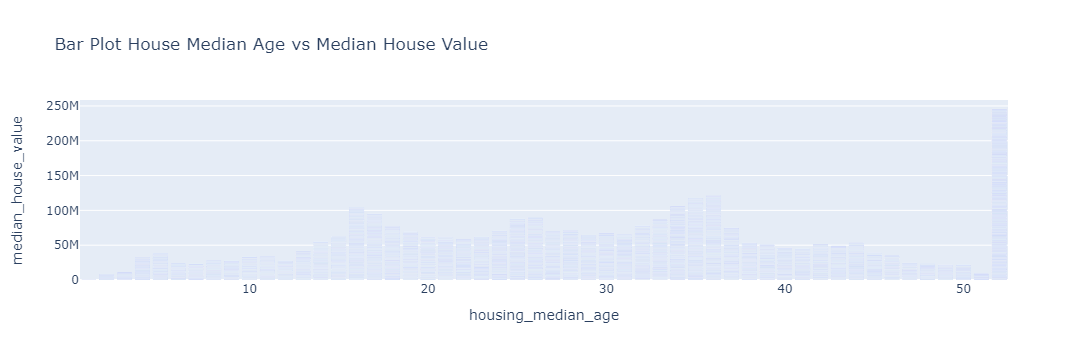

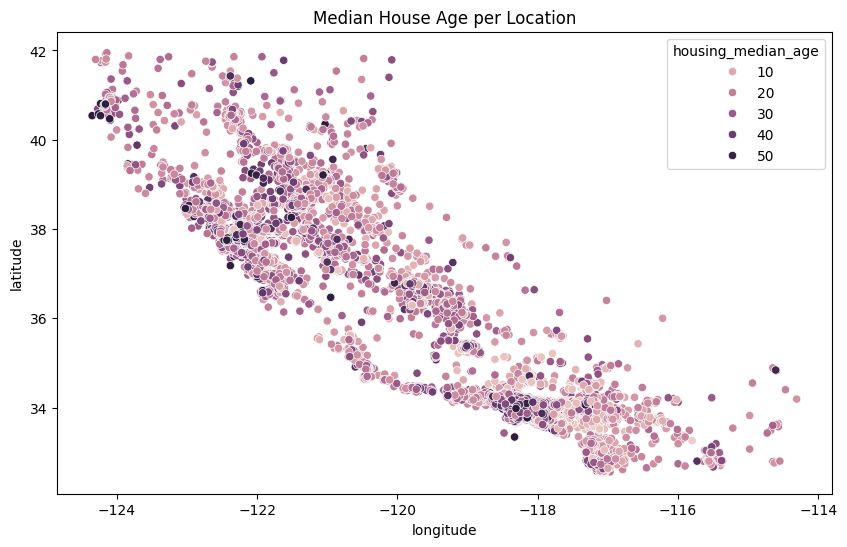

In [307]:
# Plot persebaran 'availability_365'
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['housing_median_age']).set_title('Median House Age per Location');

# Create a scatter plot using Plotly Express
fig = px.bar(df, x='housing_median_age', y='median_house_value',  color_discrete_map={'Category1':'red'},
             title='Bar Plot House Median Age vs Median House Value')

# Show the plot
fig.show()

Dapat terlihat dari grafik bahwa median house value dengan nilai yang cukup tinggi  pada range median house age 16 - 36. Terkait untuk median age 52 merupakan outlier yang memiliki pola berbeda dan berkemungkinan ada variabel lain yang mempengaruhi.

**Total Rooms and Bedrooms**

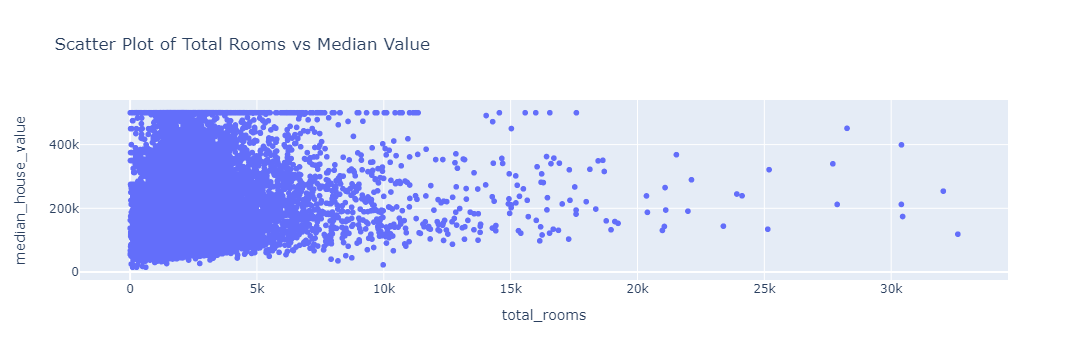

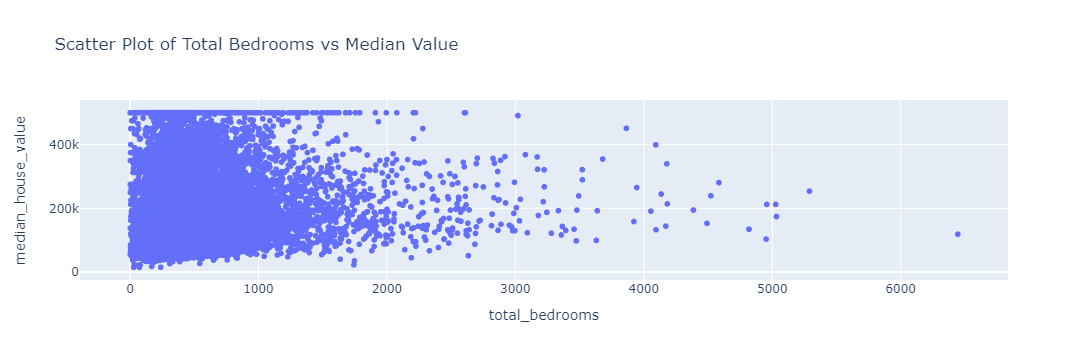

In [110]:
# Create a scatter plot using Plotly Express
fig = px.scatter(df, x='total_rooms', y='median_house_value', title='Scatter Plot of Total Rooms vs Median Value')

# Show the plot
fig.show()

# Create a scatter plot using Plotly Express
fig = px.scatter(df, x='total_bedrooms', y='median_house_value', title='Scatter Plot of Total Bedrooms vs Median Value')

# Show the plot
fig.show()

Dapat terlihat dari grafik bahwa median house value dengan nilai tertinggi pada range total bedrooms dibawah 2.300 dan total rooms di bawah 11.400.

**Median Income**

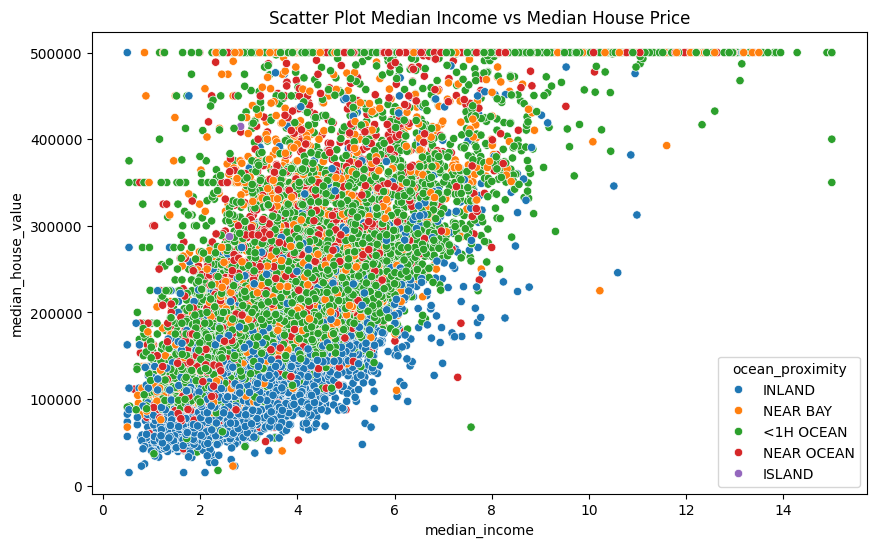

In [121]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['median_income'], y=df['median_house_value'], hue=df['ocean_proximity']).set_title('Scatter Plot Median Income vs Median House Price');

Dapat dilihat dari scatterplot diatas jika ada kecenderungan bahwa semakin besar median income maka batas bawah dari median house value juga semakin meningkat, terlihat dari pola sebaran diatas.

**Data Correlation**

In [113]:
# Cek deskriptif statistik fitur numerikal
num_features = [feature for feature in df.columns if ((df[feature].dtypes != 'object'))]
df[num_features].describe()

longitude      latitude  housing_median_age   total_rooms  \
count  14448.000000  14448.000000        14448.000000  14448.000000   
mean    -119.566647     35.630093           28.618702   2640.132683   
std        2.006587      2.140121           12.596694   2191.612441   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1451.000000   
50%     -118.490000     34.260000           29.000000   2125.000000   
75%     -118.000000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  32627.000000   

       total_bedrooms    population    households  median_income  \
count    14311.000000  14448.000000  14448.000000   14448.000000   
mean       538.260709   1425.157323    499.508929       3.866667   
std        423.577544   1149.580157    383.098390       1.891158   
min          1.000000      3.000000      1.000000       0.499900   
25%        295.000000    784.000000    279.000000       2.570600   
50%        435.000000   1165.000000    410.000000       3.539100   
75%        647.000000   1724.000000    604.000000       4.736100   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        14448.000000  
mean        206824.624516  
std         115365.476182  
min          14999.000000  
25%         119600.000000  
50%         180000.000000  
75%         263900.000000  
max         500001.000000

In [308]:
df_model = df.select_dtypes(include='number')
df_model.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -119.79     36.73                52.0        112.0            28.0   
1    -122.21     37.77                43.0       1017.0           328.0   
2    -118.04     33.87                17.0       2358.0           396.0   
3    -118.28     34.06                17.0       2518.0          1196.0   
4    -119.81     36.73                50.0        772.0           194.0   

   population  households  median_income  median_house_value  
0       193.0        40.0         1.9750             47500.0  
1       836.0       277.0         2.2604            100000.0  
2      1387.0       364.0         6.2990            285800.0  
3      3051.0      1000.0         1.7199            175000.0  
4       606.0       167.0         2.2206             59200.0

### Feature Engineering

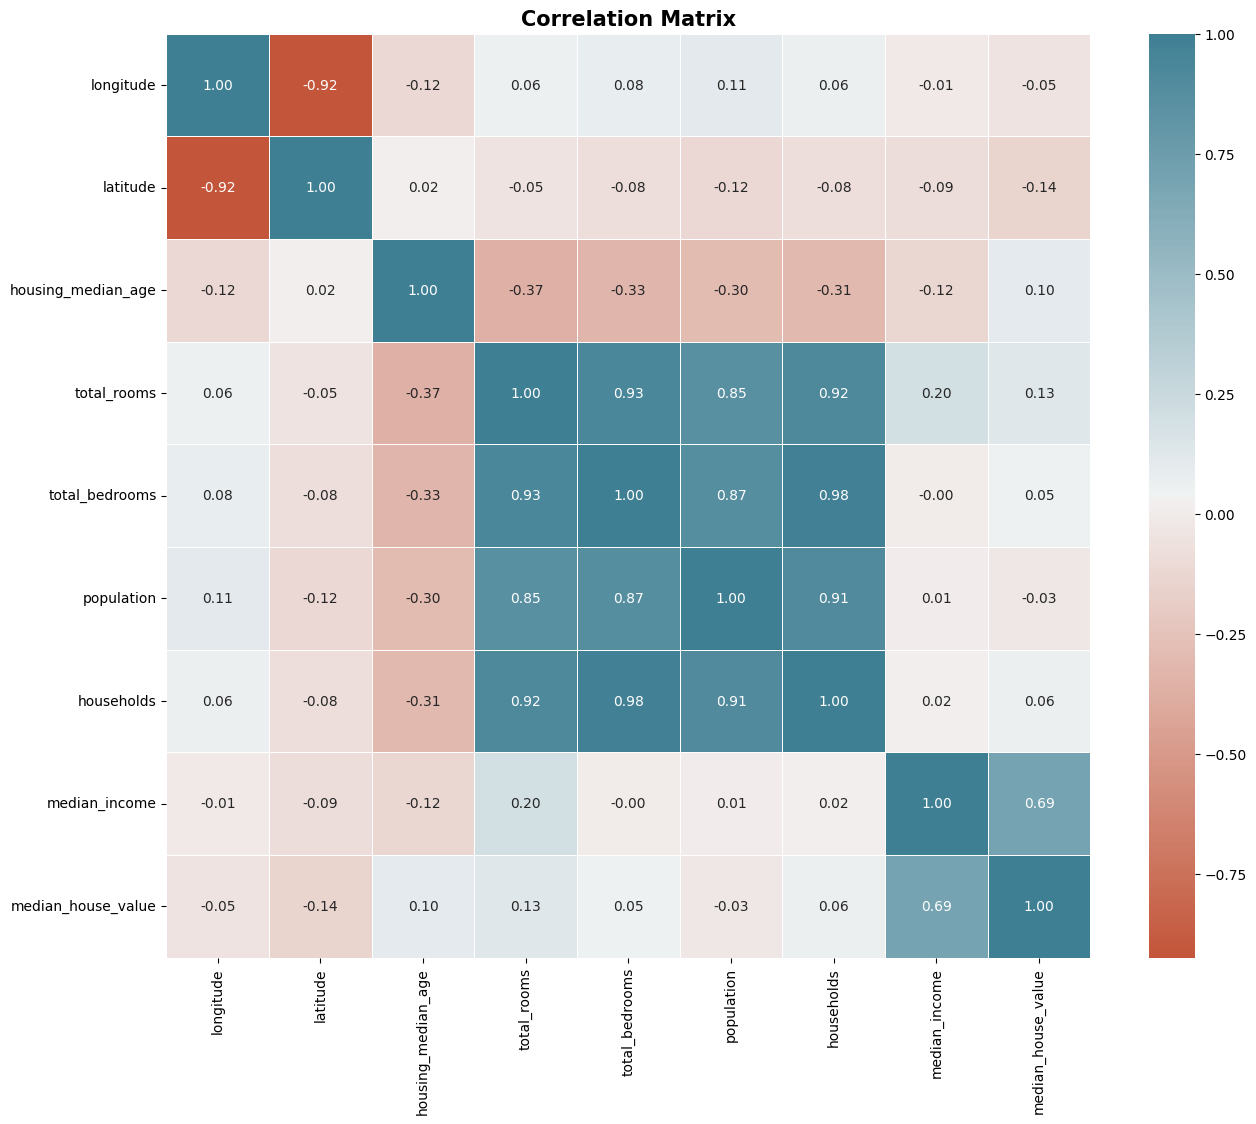

In [310]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df_model.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

Correlation matrix menunjukkan bahwa tidak ada fitur yang memiliki korelasi yang kuat terhadap fitur `median_house_value`. Korelasi paling tinggi dimiliki oleh fitur `median_income`, di mana korelasinya adalah korelasi positif. Ini berarti semakin besar `median_income` suatu listing, maka `median_house_value` pun semakin besar.

Selanjutnya, kita akan mengecek distribusi data dan outliers untuk tiap numerikal fitur. Jika distribusinya memiliki skewness yang tinggi, salah satu cara yang dapat kita lakukan untuk menguranginya adalah dengan melakukan rekayasa pada tiap fiturnya.

**Outliers Detection**

Banyaknya outliers pada data tentu akan memengaruhi hasil analisis dan pemodelan yang dilakukan. Ada beberapa hal yang harus dipertimbangkan sebelum memutuskan treatment yang sesuai dengan data, di antaranya adalah dengan mempertimbangkan sisi domain knowledge.

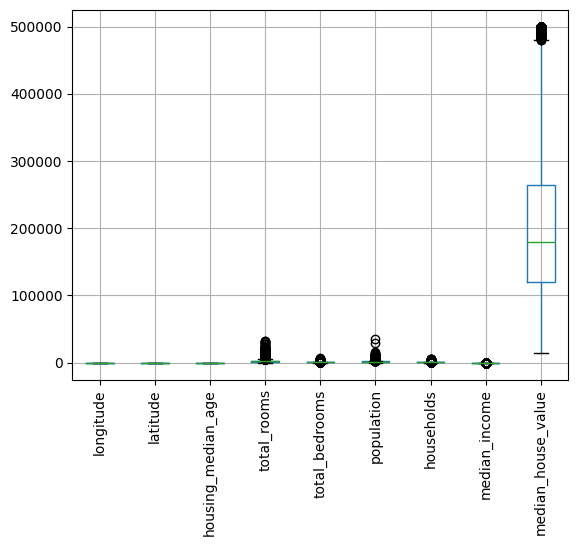

In [311]:
# Plot boxplot untuk mengecek outliers
df_model.boxplot(rot=90);

Terlihat banyak sekali outliers pada beberapa fitur. Dalam project ini, untuk membuat dataset yang lebih bersih dari outliers, saya akan melakukan beberapa rekayasa data pada fitur-fitur dengan mempertimbangkan kombinasi antara hasil dari metode IQR dan juga domain knowledge. Nantinya, model yang dihasilkan hanya terbatas dapat memprediksi listing baru yang nilai-nilainya pada rentang data berdasarkan 'clean dataset' ini saja. Di luar rentang data, hasil prediksi dari model akan menjadi bias.

In [395]:
df_model = df.copy()

In [396]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')        

In [397]:
# Outliers pada fitur median_house_value
find_anomalies(df_model['median_house_value'])

IQR: 144350.0
limit_bawah: -97125.0
limit_atas: 480275.0


In [144]:
# Outliers pada fitur housing_median_age
find_anomalies(df_model['housing_median_age'])

IQR: 19.0
limit_bawah: -10.5
limit_atas: 65.5


In [141]:
# Outliers pada fitur total_rooms
find_anomalies(df_model['total_rooms'])

IQR: 1684.0
limit_bawah: -1087.0
limit_atas: 5649.0


In [127]:
# Outliers pada fitur total_bedrooms
find_anomalies(df_model['total_bedrooms'])

IQR: 352.0
limit_bawah: -233.0
limit_atas: 1175.0


In [128]:
# Outliers pada fitur median_income
find_anomalies(df_model['median_income'])

IQR: 2.1655000000000006
limit_bawah: -0.6776500000000012
limit_atas: 7.984350000000001


Selanjutnya, kita dapat memulai feature engineering terhadap fitur-fitur numerikal.

**Median House Value**

In [398]:
# Cek deskriptif statistik kolom price
df_model['median_house_value'].describe()

count     14311.000000
mean     206793.156942
std      115404.371629
min       14999.000000
25%      119400.000000
50%      180000.000000
75%      263750.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [399]:
# Cek median_house_value > $480275.0
df_model[df_model['median_house_value'] > 480275.0].count()['median_house_value']

751

Terlihat bahwa 75% data pada kolom median house value bernilai kurang dari USD 263,750, sedangkan nilai maksimalnya adalah USD 500,001. Tentu terdapat skewness pada distribusinya, yaitu tail yang memanjang di sebelah kanan (positive skewness). Terdapat 751 data yang nilai median house value-nya lebih besar dari USD 480,275 (batas atas berdasarkan metode IQR). Oleh karena itu, data yang memiliki median house value lebih besar dari  USD 480,275 tidak akan dimasukkan ke dalam pemodelan, sehingga skewness-nya pun akan berkurang. Hal ini tentu akan menjadi limitasi untuk model yang nantinya dibangun. 

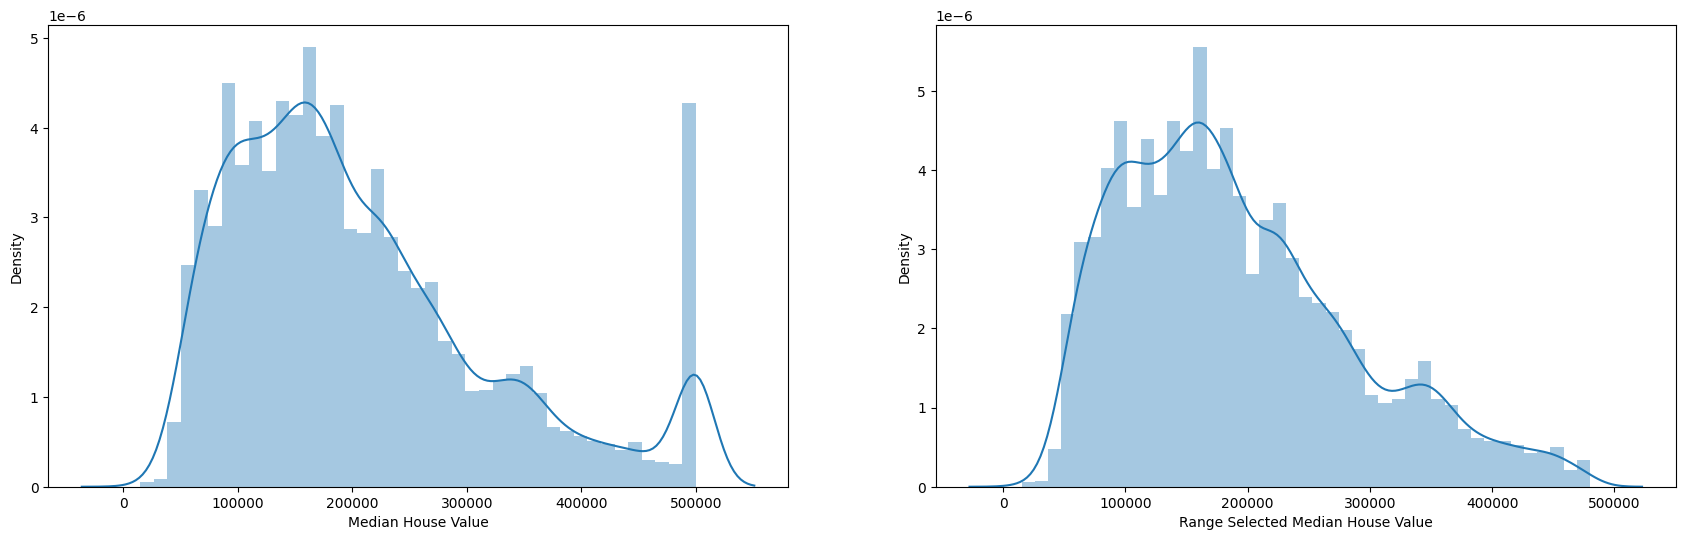

In [400]:
# Melakukan filtering pada data
df_model = df_model[(df_model['median_house_value'] <= 480350.0)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['median_house_value'], ax=axes[0])
sns.distplot(df_model['median_house_value'], ax=axes[1])
axes[0].set_xlabel('Median House Value')
axes[1].set_xlabel('Range Selected Median House Value');

In [401]:
# Cek deskriptif statistik kolom 'median_house_value' setelah filtering
df_model['median_house_value'].describe()

count     13560.000000
mean     190602.086799
std       95180.551359
min       14999.000000
25%      116200.000000
50%      173350.000000
75%      246000.000000
max      480100.000000
Name: median_house_value, dtype: float64

**Housing Median Age**

Meskipun batas atas berdasarkan metode IQR untuk fitur 'housing_median_age' adalah 65.5, namun ternyata tidak ada data yang lebih besar dari 65.5. 

Oleh karena itu, dipilihlah cara dengan mengambil asumsi bahwa data yang digunakan adalah data dengan umur listing tidak lebih dari 50 tahun (asumsi di dapatkan dari ketentuan bahwa batas maksimal umur gedung besar dan apartemen adalah 50 tahun karena untuk bangunan yang umurnya 50 tahun ke atas rata - rata sudah bermasalah [https://ohp.parks.ca.gov/pages/1069/files/14_hp_ordinances.pdf]). Pada akhirnya, data yang house_median_age lebih besar dari 50 akan di-drop, sehingga nilai skewness untuk fitur ini pun akan berkurang. 

In [143]:
# Cek deskriptif statistik kolom housing_median_age
df_model['housing_median_age'].describe()

count    13691.000000
mean        28.326857
std         12.495312
min          1.000000
25%         18.000000
50%         28.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

In [402]:
# Cek jumlah nilai housing_median_age > 50
df_model[df_model['housing_median_age'] > 50].count()['housing_median_age']

783

In [403]:
# Memilih data dengan nilai housing_median_age tidak lebih dari 50
df_model = df_model[(df_model['housing_median_age'] <= 50)]

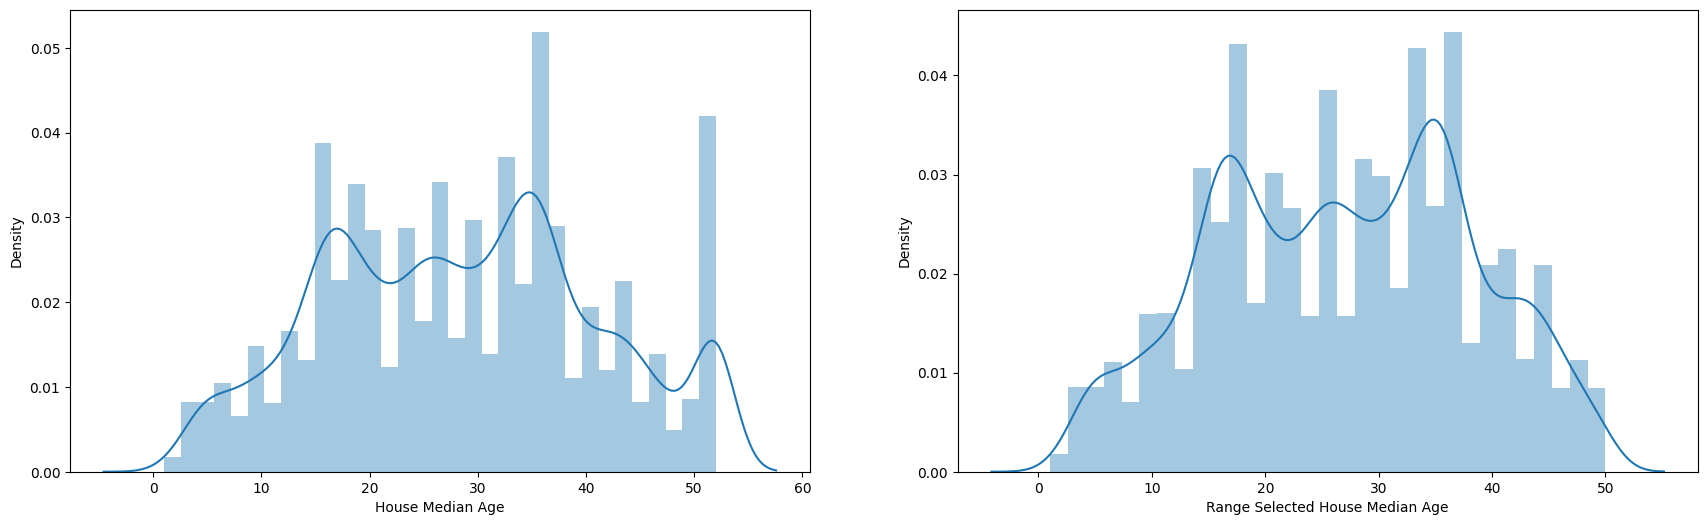

In [404]:
# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['housing_median_age'], ax=axes[0])
sns.distplot(df_model['housing_median_age'], ax=axes[1])
axes[0].set_xlabel('House Median Age')
axes[1].set_xlabel('Range Selected House Median Age');

**Total Rooms, Bedrooms, Population, and Households**

In [155]:
df_model['total_bedrooms'].describe()

count    12777.000000
mean       549.463802
std        433.521681
min          2.000000
25%        299.000000
50%        443.000000
75%        661.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [158]:
df_model['total_rooms'].describe()

count    12904.000000
mean      2674.596869
std       2232.958727
min          2.000000
25%       1457.000000
50%       2144.000000
75%       3186.250000
max      32627.000000
Name: total_rooms, dtype: float64

In [161]:
df_model['population'].describe()

count    12904.000000
mean      1472.859966
std       1182.452819
min          3.000000
25%        810.000000
50%       1207.000000
75%       1782.000000
max      35682.000000
Name: population, dtype: float64

In [162]:
df_model['households'].describe()

count    12904.000000
mean       509.525883
std        391.782687
min          2.000000
25%        283.000000
50%        416.000000
75%        616.000000
max       6082.000000
Name: households, dtype: float64

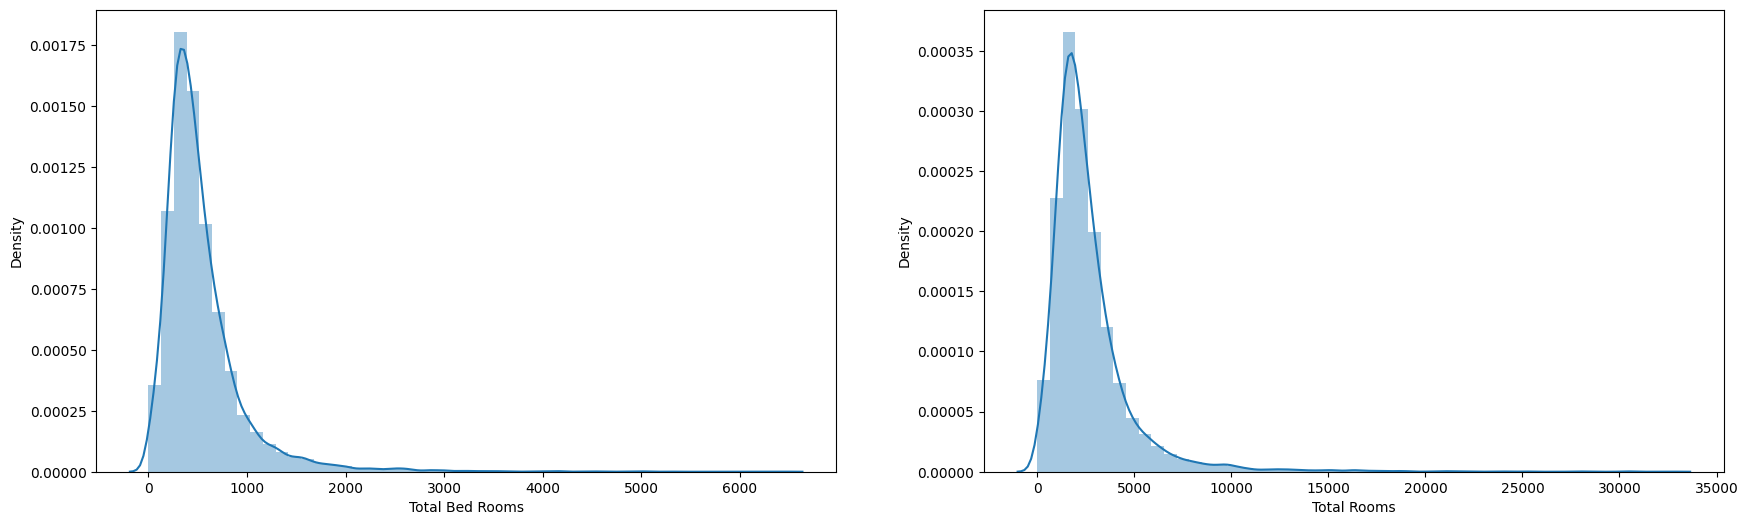

In [321]:
# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['total_bedrooms'], ax=axes[0])
sns.distplot(df_model['total_rooms'], ax=axes[1])
axes[0].set_xlabel('Total Bed Rooms')
axes[1].set_xlabel('Total Rooms');

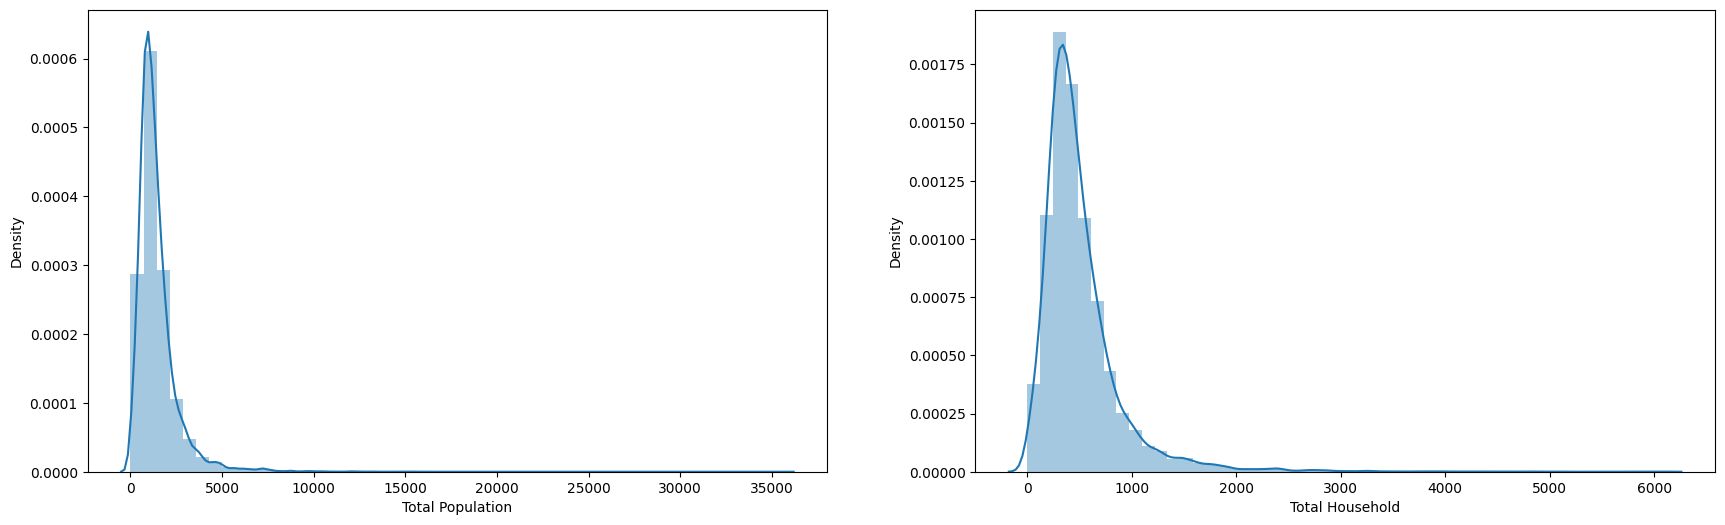

In [322]:
# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['population'], ax=axes[0])
sns.distplot(df_model['households'], ax=axes[1])
axes[0].set_xlabel('Total Population')
axes[1].set_xlabel('Total Household');

Setelah dilakukan pengecekkan untuk sebaran berdasarkan fitur total bedrooms dan total rooms memiliki sebaran yang relatif normal, sehingga tidak perlu dilakukan adjustment.

**Median Income**

In [185]:
# Cek statistik deskriptif fitur 'availability_365'
df_model['median_income'].describe()

count    12904.000000
mean         3.678166
std          1.545415
min          0.499900
25%          2.541700
50%          3.466300
75%          4.591300
max         15.000100
Name: median_income, dtype: float64

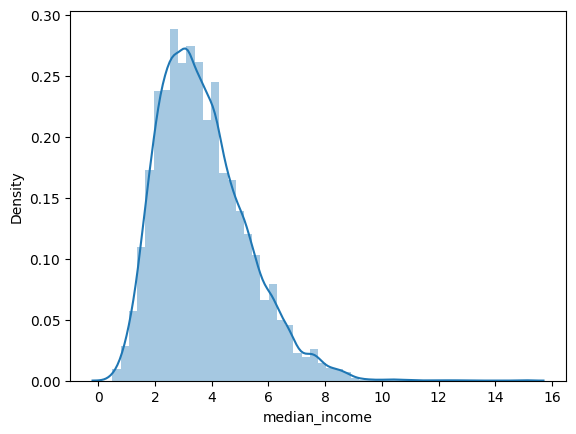

In [323]:
# Plot distribusi fitur 'availability_365'
sns.distplot(df_model['median_income']);

In [165]:
# Cek jumlah data dengan nilai median income = 0
df_model[df_model['median_income'] == 0].count()['median_income']

0

Tidak terdapat median income yang anomali, sebaran data juga relatif normal sehingga dapat disimpulkan fitur ini tidak perlu dilakukan adjustment. 

**Clean Dataset**

In [166]:
# Cek dataset yang sudah bersih
df_model.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1    -122.21     37.77                43.0       1017.0           328.0   
2    -118.04     33.87                17.0       2358.0           396.0   
3    -118.28     34.06                17.0       2518.0          1196.0   
4    -119.81     36.73                50.0        772.0           194.0   
5    -117.79     33.80                11.0      10535.0          1620.0   

   population  households  median_income  median_house_value  
1       836.0       277.0         2.2604            100000.0  
2      1387.0       364.0         6.2990            285800.0  
3      3051.0      1000.0         1.7199            175000.0  
4       606.0       167.0         2.2206             59200.0  
5      4409.0      1622.0         6.6700            283200.0

In [260]:
# Cek kembali info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12777 entries, 1 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           12777 non-null  float64
 1   latitude            12777 non-null  float64
 2   housing_median_age  12777 non-null  float64
 3   total_rooms         12777 non-null  float64
 4   total_bedrooms      12777 non-null  float64
 5   population          12777 non-null  float64
 6   households          12777 non-null  float64
 7   median_income       12777 non-null  float64
 8   ocean_proximity     12777 non-null  object 
 9   median_house_value  12777 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


Pada akhirnya, tersisa 12.777 baris data yang akan digunakan untuk pemodelan. Ini berarti lebih dari 10% data sudah tereliminasi sesuai dengan asumsi dan argumen yang disampaikan di proses-proses sebelumnya.

### **Modeling**

In [324]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

### Preprocessing

**Encoding**

Agar dapat menggunakan semua fitur yang dipilih, maka fitur-fitur kategorikal harus diubah menjadi fitur numerikal. Kita dapat menggunakan ColumnTransformer untuk dapat mengubah tipe datanya, yang mana nanti dapat diaplikasikan pada pipeline model.

In [349]:
# Mengubah fitur kategorikal menjadi numerikal

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['ocean_proximity']),
    ('Binary', ce.BinaryEncoder(), ['ocean_proximity'])
], remainder='passthrough')

**Data Splitting**

In [350]:
# Memisahkan data independen variabel dengan target
X = df_model.drop(['median_house_value'], axis=1)
y = df_model['median_house_value']

In [351]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12777 entries, 1 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           12777 non-null  float64
 1   latitude            12777 non-null  float64
 2   housing_median_age  12777 non-null  float64
 3   total_rooms         12777 non-null  float64
 4   total_bedrooms      12777 non-null  float64
 5   population          12777 non-null  float64
 6   households          12777 non-null  float64
 7   median_income       12777 non-null  float64
 8   ocean_proximity     12777 non-null  object 
 9   median_house_value  12777 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


**Train and Test Splitting**

In [352]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=1)

**Choose a Benchmark Model**

In [353]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-59751.77035019 -57531.43784361 -58023.67222293 -54554.5036548
 -72364.25636388] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-41830.64076408 -40548.24882863 -40986.85196181 -39876.40768876
 -43708.63642136] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.23897303 -0.23684124 -0.24522268 -0.23092316 -0.23995644] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-54816.77713669 -54128.05943007 -54339.04731264 -52517.33415264
 -55858.20647527] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-37447.37630602 -37281.81093072 -37789.03072726 -37434.40081417
 -37847.44081106] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
 

In [354]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

Model     Mean_RMSE     Std_RMSE      Mean_MAE  \
0       Linear Regression -60445.128087  6190.296590 -41390.157133   
1           KNN Regressor -54331.884901  1086.183094 -37560.011918   
2  DecisionTree Regressor -62398.479543  1341.025474 -42036.604138   
3  RandomForest Regressor -45724.068431  2065.129781 -30486.239600   
4       XGBoost Regressor -43832.788032  1834.056362 -29264.506469   

       Std_MAE  Mean_MAPE  Std_MAPE  
0  1321.535022  -0.238383  0.004640  
1   219.511140  -0.211648  0.003817  
2   859.045579  -0.241222  0.007788  
3   681.094752  -0.172344  0.004741  
4   677.955861  -0.165824  0.006485

Terlihat perbedaan cukup signifikan antara nilai RMSE dan MAE, dimana nilai RMSE lebih tinggi karena nilai residual / error dikuadratkan terlebih dahulu sebelum dihitung rata - ratanya. Hal ini menyebabkan RMSE akan memberikan `weight` yang lebih tinggi untuk nilai error yang besar. Dengan kata lain, terdapat nilai-nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan, sehingga ada perbedaan cukup signifikan antara nilai RMSE dan MAE.

- Dilihat dari nilai RMSE, XGBoost adalah model terbaik. Apabila jika berdasarkan nilai MAE dan MAPE, KNN memiliki nilai paling rendah.
- Selanjutnya, akan dilakukan prediksi pada test-set dengan 2 benchmark model terbaik, yaitu XGBoost dan KNN. 

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost dan KNN

In [355]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
    'KNN': KNeighborsRegressor()
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:
    print(i)
    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

XGB
KNN


RMSE           MAE      MAPE
XGB  42863.057489  29102.168204  0.174472
KNN  54865.552405  37828.669849  0.219099

Ketika dilakukan prediksi pada test set, performa XGBoost secara overall sedikit lebih baik. Hal ini dapat dilihat dari nilai RMSE dan MAE yang sedikit lebih rendah dari KNN.


**Hyperparameter Tuning**

Model XGBoost memiliki performa yang sedikit lebih baik dari KNN, maka selanjutnya kita akan menggunakan model XGBoost ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model tersebut.

Untuk panduan tuning model XGBoost, dapat merujuk ke [Tuning XGBoost](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters).

In [356]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [357]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [358]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['ocean_proximity']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['ocean_proximity'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booste...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [359]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
7        1.613434      0.286023         0.055570        0.012828   
20       0.300323      0.008600         0.019759        0.002550   
17       0.731228      0.204047         0.028582        0.001995   
3        1.146464      0.050789         0.078126        0.005186   
8        0.717730      0.027502         0.033186        0.005111   

   param_model__subsample param_model__reg_alpha param_model__n_estimators  \
7                     0.9               0.059948                       119   
20                    0.9               0.007743                       143   
17                    0.6                  0.001                       190   
3                     0.5               0.021544                       166   
8                     0.7               0.021544                       182   

   param_model__max_depth param_model__learning_rate param_model__gamma  ...  \
7                       8                       0.05                  5  ...   
20                      4                       0.38                  6  ...   
17                      5                       0.04                  9  ...   
3                       8                        0.1                  9  ...   
8                       6                       0.31                  2  ...   

   std_test_neg_mean_absolute_error rank_test_neg_mean_absolute_error  \
7                        604.471521                                 1   
20                       762.559280                                 2   
17                       577.475435                                 3   
3                        602.292671                                 6   
8                        441.451520                                 4   

    split0_test_neg_mean_absolute_percentage_error  \
7                                        -0.176364   
20                                       -0.188940   
17                                       -0.192145   
3                                        -0.199511   
8                                        -0.194119   

    split1_test_neg_mean_absolute_percentage_error  \
7                                        -0.176386   
20                                       -0.190994   
17                                       -0.189434   
3                                        -0.199601   
8                                        -0.199312   

    split2_test_neg_mean_absolute_percentage_error  \
7                                        -0.189265   
20                                       -0.198562   
17                                       -0.201053   
3                                        -0.209558   
8                                        -0.204442   

    split3_test_neg_mean_absolute_percentage_error  \
7                                        -0.169152   
20                                       -0.183116   
17                                       -0.182511   
3                                        -0.190319   
8                                        -0.188222   

    split4_test_neg_mean_absolute_percentage_error  \
7                                        -0.168214   
20                                       -0.181784   
17                                       -0.182258   
3                                        -0.186110   
8                                        -0.187015   

    mean_test_neg_mean_absolute_percentage_error  \
7                                      -0.175876   
20                                     -0.188679   
17                                     -0.189480   
3                                      -0.197020   
8                                      -0.194622   

    std_test_neg_mean_absolute_percentage_error  \
7                                      0.007532   
20                                     0.006026   
17                                     0.006954   
3                                      0.008173   
8            

In [360]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -42852.29575828341
Best_params: {'model__subsample': 0.9, 'model__reg_alpha': 0.05994842503189409, 'model__n_estimators': 119, 'model__max_depth': 8, 'model__learning_rate': 0.05, 'model__gamma': 5, 'model__colsample_bytree': 0.8}


**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [361]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

RMSE           MAE      MAPE
XGB  42804.51756  29058.629018  0.174607

**Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

**Sebelum Hyper Parameter Tuning**

In [362]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

RMSE           MAE      MAPE
XGB  42863.057489  29102.168204  0.174472

**Setelah Hyper Parameter Tuning**

In [363]:
# Setelah hyperparameter tuning
score_after_tuning

RMSE           MAE      MAPE
XGB  42804.51756  29058.629018  0.174607

Model mengalami peningkatan performa (nilai RMSE, MAE & MAPE berkurang) dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit.
- RMSE, MAE & MAPE sebelum tuning: 42863.05, 29102.16, 0.174472
- RMSE, MAE & MAPE setelah tuning: 42804.51, 29058.62, 0.174607

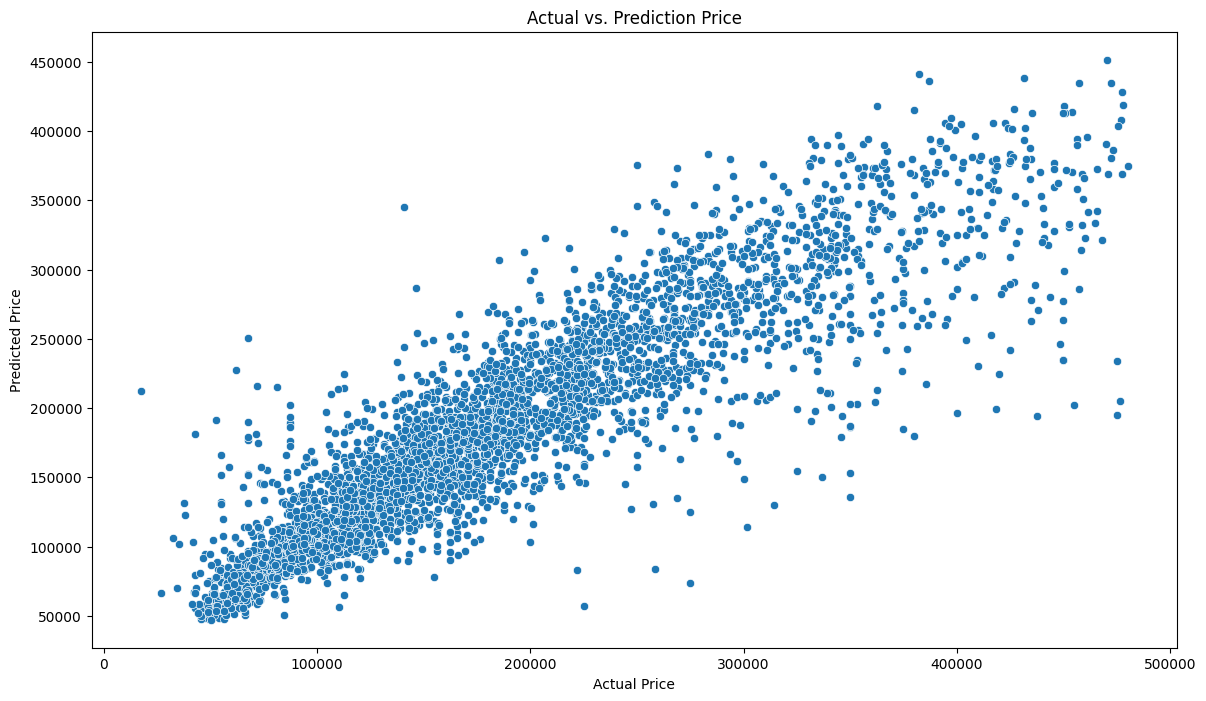

In [364]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

Adanya nilai-nilai error yang besar membuat perbedaan yang cukup signifikan antara nilai RMSE dan MAE. Hal ini dapat tergambarkan pula pada plot di atas, di mana terdapat harga aktual yang rendah tapi diprediksi jauh lebih tinggi (overestimation), dan juga sebaliknya (underestimation). Akan tetapi, nilai MAPE yang didapat, yaitu sekitar 17.46% menjadikan model ini dapat dikategorikan ke dalam **good forecasting** (Lewis, 1982).

*Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting*

**Feature Importances**

Untuk bisa mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (median house value), kita dapat mengeceknya melalui function feature_importances.

In [383]:
feature_name = pd.Series(df.columns)
new_feature = pd.Series(transformer.named_transformers_['Binary'].get_feature_names())
onehot_feature = pd.Series(['One_Hot_Ocean_Proximity'])
merge_feature = pd.concat([feature_name, new_feature])
merge_feature = pd.concat([merge_feature, onehot_feature])
merge_feature.count()

14

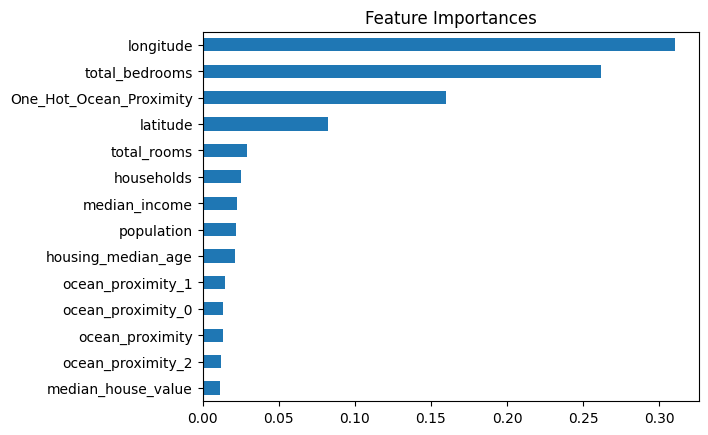

In [387]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, merge_feature).sort_values(ascending = True)
feature_imp.plot(kind='barh', title='Feature Importances');

### **Conclusion**

Berdasarkan pemodelan yang sudah dilakukan, fitur `longitude`, `total_bedrooms` dan `ocean_proximity` menjadi fitur yang paling berpengaruh terhadap 'median house value'.

Metrik evaluasi yang digunakan pada model adalah nilai RMSE, MAE & MAPE. Jika ditinjau dari nilai MAPE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning, yaitu sebesar ~17.46%, kita dapat menyimpulkan bahwa bila nanti model yang kita buat ini digunakan untuk memperkirakan harga listing baru di California pada rentang nilai seperti yang dilatih terhadap model (maksimal harga USD 480,275), maka perkiraan median house value akan meleset kurang lebih sebesar 17.46% dari harga seharusnya. 
 
Tetapi, tidak menutup kemungkinan juga prediksinya meleset lebih jauh karena bias yang dihasilkan model masih cukup tinggi bila dilihat dari visualisasi antara harga aktual dan prediksi. Bias yang dihasilkan oleh model ini dikarenakan oleh terbatasnya fitur pada dataset yang bisa merepresentasikan aspek properti, seperti jumlah kamar, jumlah ruangan, ocean proximity, lokasi, dan populasi. 

Model ini tentu masih dapat diimporvisasi agar dapat menghasilkan prediksi yang lebih baik lagi. Namun, kita dapat melakukan A/B testing terhadap model yang sudah dibuat pada project ini untuk mengetahui tingkat efektifitas penggunaan model terhadap peningkatan jumlah sewa listing. Nantinya, dari hasil A/B testing, kita bisa mendapatkan insight lainnya terkait perihal yang bisa dan harus diperbaiki pada model.  

### **Recommendations**

Lakukan A/B testing untuk menguji tingkat efektivitas model terhadap lakunya listing jika dibandingkan dengan host yang menentukan harga sewa listingnya sendiri.

Lalu, hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:

1. Mengecek prediksi mana saja yang memiliki nilai error yang tinggi. Kita dapat mengelompokkan error tersebut ke dalam grup overestimation dan underestimation, lalu memilih 5% error paling ekstrim saja untuk tiap grup. Nantinya pengelompokkan akan menjadi 3 grup, yaitu overestimation (5%), underestimation (5%), dan grup mayoritas yang error-nya mendekati nilai mean (90%). Setelahnya kita bisa mengecek hubungan antara error tersebut dengan tiap variabel independen. Pada akhirnya kita dapat mengetahui sebenarnya variabel mana saja dan aspek apa yang menyebabkan model menghasilkan error yang tinggi, sehingga kita bisa melakukan training ulang dengan penerapan feature engineering lainnya.
<br><br>   
2. Jika memungkinkan, penambahan fitur yang lebih korelatif dengan target (`median_house_value`), seperti luas kamar atau jarak ke garis pantai. Selain itu, adanya penambahan data terkini untuk California House Pricing tentu akan dapat mengimprovisasi kapasitas prediksi dari model.
<br><br>   
3. Jika ada penambahan banyak data, dapat dicoba dengan menggunakan model yang lebih kompleks, seperti recursive neural networks (RNN). Namun, kalau jumlah data dan fiturnya masih seperti dataset ini, kemungkinan besar tidak akan mengubah hasilnya secara signifikan.
<br><br>   
4. Model yang sudah dibangun ini bisa dimanfaatkan untuk pengembangan pembuatan model lainnya. Contohnya seperti pembuatan model untuk memprediksi update harga properti . Pembuatan model dengan tujuan seperti ini dapat memanfaatkan data asli rilisan dari California untuk tahun terakhir yakni 2023 yang mungkin memiliki kolom fitur data yang lebih lengkap. Jika memang ada, kita dapat melakukan analysis untuk mendapatkan insight dari penentuan nilai properti tersebut yang lebih aktual. 

****

#### **Save Model, Creating Pickle & Load Pickle**

In [406]:
# Save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Model_California_House_Price_XGB_Albert.sav', 'wb'))

In [407]:
# Load model
filename = 'Model_California_House_Price_XGB_Albert.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [412]:
print('Score : {}'.format(np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))))

Score : 42863.05748850603
